## 48k_DE_load1_segment1024_overlap0_TDFeature

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# 設定隨機種子
SEED = 42
np.random.seed(SEED)

In [2]:
df = pd.read_pickle("datas/48k_DE_load1_segment1024_overlap0_TDFeature.pkl")

In [3]:
train_data, test_data = train_test_split(df, test_size = int(len(df) * 0.2), stratify = df['fault'],
                                         random_state = SEED)
test_data['fault'].value_counts()

fault
OR_014      92
IR_021      92
Ball_007    92
OR_021      92
IR_014      92
IR_007      92
Normal      92
Ball_014    92
OR_007      92
Ball_021    92
Name: count, dtype: int64

In [4]:
train_data.shape, test_data.shape

((3680, 10), (920, 10))

In [5]:
scaler = StandardScaler()
train_data_scaled = scaler.fit_transform(train_data.iloc[:,:-1])

In [6]:
# test_data_scaled = (test_data.iloc[:,:-1].values - scaler.mean_)/np.sqrt(scaler.var_)
test_data_scaled = scaler.transform(test_data.iloc[:,:-1])

In [7]:
parameters = {"C":[1, 10, 50, 100, 300, 500],
             'gamma':[0.01, 0.05, 0.1, 0.5, 1, 5],
             'kernel':["rbf"]}

In [8]:
tuned_svm_clf = GridSearchCV(SVC(),parameters,n_jobs = -1, cv= 10)

In [9]:
tuned_svm_clf.fit(train_data_scaled, train_data['fault'])

GridSearchCV(cv=10, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [1, 10, 50, 100, 300, 500],
                         'gamma': [0.01, 0.05, 0.1, 0.5, 1, 5],
                         'kernel': ['rbf']})

In [10]:
tuned_svm_clf.best_score_

0.9051630434782609

In [11]:
tuned_svm_clf.best_params_

{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}

Now we will used the best model to find test accuracy.

In [12]:
best_clf = tuned_svm_clf.best_estimator_
best_clf

SVC(C=100, gamma=0.1)

In [13]:
train_predictions = best_clf.predict(train_data_scaled)
test_predictions = best_clf.predict(test_data_scaled)

In [14]:
train_confu_matrix = confusion_matrix(train_data['fault'], train_predictions)
test_confu_matrix = confusion_matrix(test_data['fault'], test_predictions)

Train confusion matrix.

In [15]:
_ = list(test_data['fault'].unique())
_.sort()
_

['Ball_007',
 'Ball_014',
 'Ball_021',
 'IR_007',
 'IR_014',
 'IR_021',
 'Normal',
 'OR_007',
 'OR_014',
 'OR_021']

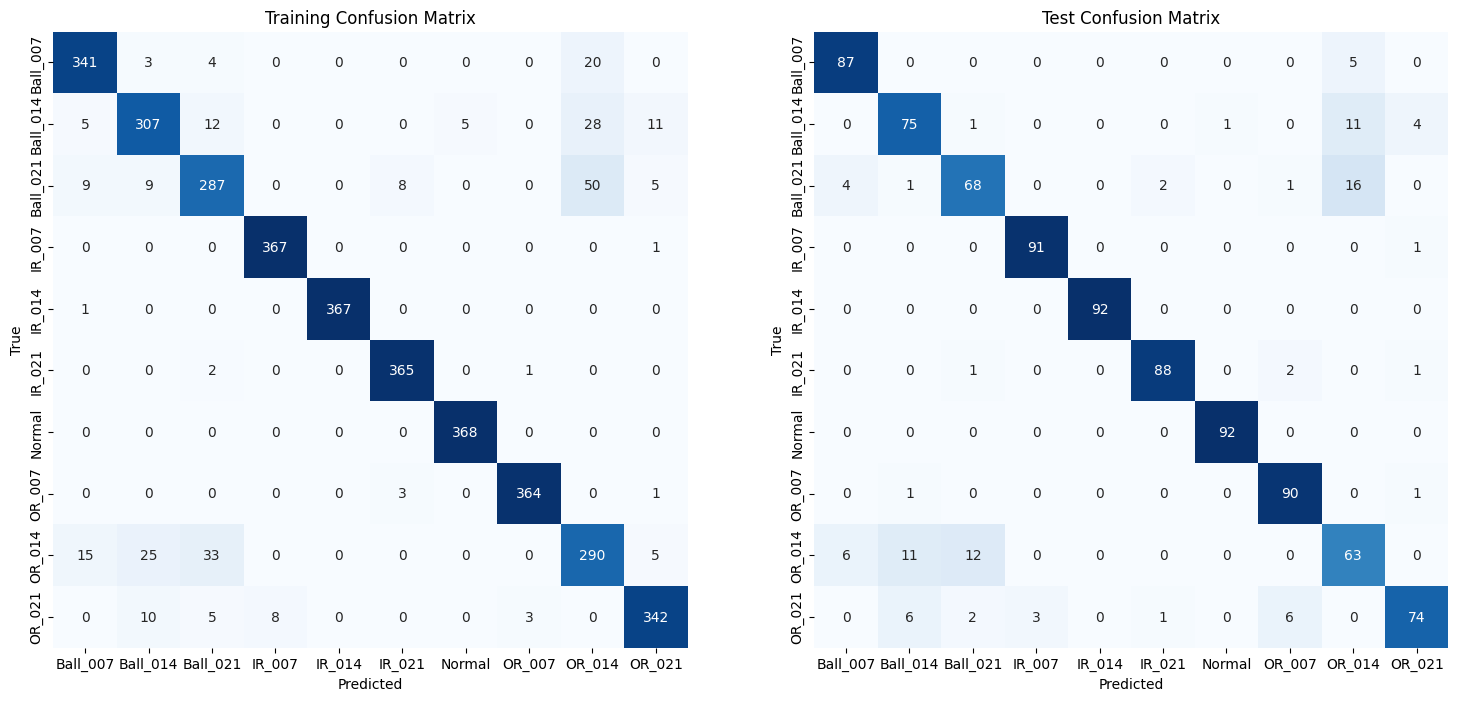

In [16]:
fault_type = _
plt.figure(1,figsize=(18,8))
plt.subplot(121)
sns.heatmap(train_confu_matrix, annot= True,fmt = "d",
xticklabels=fault_type, yticklabels=fault_type, cmap = "Blues", cbar = False)
plt.title('Training Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.subplot(122)
sns.heatmap(test_confu_matrix, annot = True,
xticklabels=fault_type, yticklabels=fault_type, cmap = "Blues", cbar = False)
plt.title('Test Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [17]:
# 使用最佳模型來預測測試集
y_pred = tuned_svm_clf.best_estimator_.predict(test_data_scaled)
# 計算準確率
test_accuracy = accuracy_score(test_data['fault'], y_pred)
print("Test Accuracy:", test_accuracy)

Test Accuracy: 0.8913043478260869


## 48k_DE_load1_segment2048_overlap0_TDFeature

In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# 設定隨機種子
SEED = 42
np.random.seed(SEED)
df = pd.read_pickle("datas/48k_DE_load1_segment2048_overlap0_TDFeature.pkl")
df
train_data, test_data = train_test_split(df, test_size = int(len(df) * 0.2), stratify = df['fault'],
                                         random_state = SEED)
test_data['fault'].value_counts()
train_data.shape, test_data.shape
scaler = StandardScaler()
train_data_scaled = scaler.fit_transform(train_data.iloc[:,:-1])
# test_data_scaled = (test_data.iloc[:,:-1].values - scaler.mean_)/np.sqrt(scaler.var_)
test_data_scaled = scaler.transform(test_data.iloc[:,:-1])
parameters = {"C":[1, 10, 50, 100, 300, 500],
             'gamma':[0.01, 0.05, 0.1, 0.5, 1, 5],
             'kernel':["rbf"]}
tuned_svm_clf = GridSearchCV(SVC(),parameters,n_jobs = -1, cv= 10)
tuned_svm_clf.fit(train_data_scaled, train_data['fault'])

GridSearchCV(cv=10, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [1, 10, 50, 100, 300, 500],
                         'gamma': [0.01, 0.05, 0.1, 0.5, 1, 5],
                         'kernel': ['rbf']})

In [19]:
tuned_svm_clf.best_score_

0.9701086956521738

In [20]:
tuned_svm_clf.best_params_

{'C': 300, 'gamma': 0.05, 'kernel': 'rbf'}

Now we will used the best model to find test accuracy.

In [21]:
best_clf = tuned_svm_clf.best_estimator_
best_clf

SVC(C=300, gamma=0.05)

In [22]:
train_predictions = best_clf.predict(train_data_scaled)
test_predictions = best_clf.predict(test_data_scaled)
train_confu_matrix = confusion_matrix(train_data['fault'], train_predictions)
test_confu_matrix = confusion_matrix(test_data['fault'], test_predictions)
_ = list(test_data['fault'].unique())
_.sort()
_

['Ball_007',
 'Ball_014',
 'Ball_021',
 'IR_007',
 'IR_014',
 'IR_021',
 'Normal',
 'OR_007',
 'OR_014',
 'OR_021']

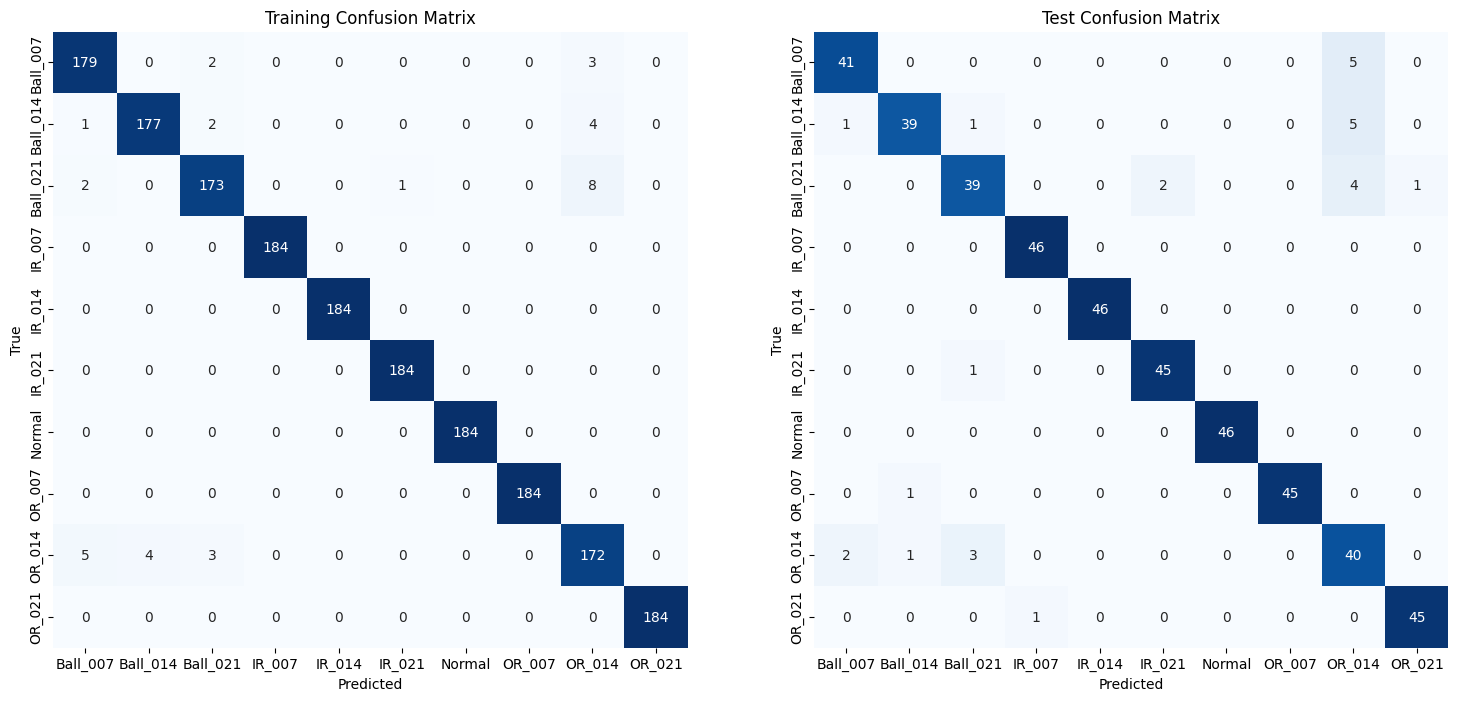

In [23]:
fault_type = _
plt.figure(1,figsize=(18,8))
plt.subplot(121)
sns.heatmap(train_confu_matrix, annot= True,fmt = "d",
xticklabels=fault_type, yticklabels=fault_type, cmap = "Blues", cbar = False)
plt.title('Training Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.subplot(122)
sns.heatmap(test_confu_matrix, annot = True,
xticklabels=fault_type, yticklabels=fault_type, cmap = "Blues", cbar = False)
plt.title('Test Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [24]:
# 使用最佳模型來預測測試集
y_pred = tuned_svm_clf.best_estimator_.predict(test_data_scaled)
# 計算準確率
test_accuracy = accuracy_score(test_data['fault'], y_pred)
print("Test Accuracy:", test_accuracy)

Test Accuracy: 0.9391304347826087


## 48k_DE_load1_segment4096_overlap2

In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# 設定隨機種子
SEED = 42
np.random.seed(SEED)
df = pd.read_pickle("datas/48k_DE_load1_segment4096_overlap2_TDFeature.pkl")
df
train_data, test_data = train_test_split(df, test_size = int(len(df) * 0.2), stratify = df['fault'],
                                         random_state = SEED)
test_data['fault'].value_counts()
train_data.shape, test_data.shape
scaler = StandardScaler()
train_data_scaled = scaler.fit_transform(train_data.iloc[:,:-1])
# test_data_scaled = (test_data.iloc[:,:-1].values - scaler.mean_)/np.sqrt(scaler.var_)
test_data_scaled = scaler.transform(test_data.iloc[:,:-1])
parameters = {"C":[1, 10, 50, 100, 300, 500],
             'gamma':[0.01, 0.05, 0.1, 0.5, 1, 5],
             'kernel':["rbf"]}
tuned_svm_clf = GridSearchCV(SVC(),parameters,n_jobs = -1, cv= 10)
tuned_svm_clf.fit(train_data_scaled, train_data['fault'])

GridSearchCV(cv=10, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [1, 10, 50, 100, 300, 500],
                         'gamma': [0.01, 0.05, 0.1, 0.5, 1, 5],
                         'kernel': ['rbf']})

In [26]:
tuned_svm_clf.best_score_

0.9851258581235698

In [27]:
tuned_svm_clf.best_params_

{'C': 500, 'gamma': 0.05, 'kernel': 'rbf'}

Now we will used the best model to find test accuracy.

In [28]:
best_clf = tuned_svm_clf.best_estimator_
best_clf

SVC(C=500, gamma=0.05)

In [29]:
train_predictions = best_clf.predict(train_data_scaled)
test_predictions = best_clf.predict(test_data_scaled)
train_confu_matrix = confusion_matrix(train_data['fault'], train_predictions)
test_confu_matrix = confusion_matrix(test_data['fault'], test_predictions)
_ = list(test_data['fault'].unique())
_.sort()
_

['Ball_007',
 'Ball_014',
 'Ball_021',
 'IR_007',
 'IR_014',
 'IR_021',
 'Normal',
 'OR_007',
 'OR_014',
 'OR_021']

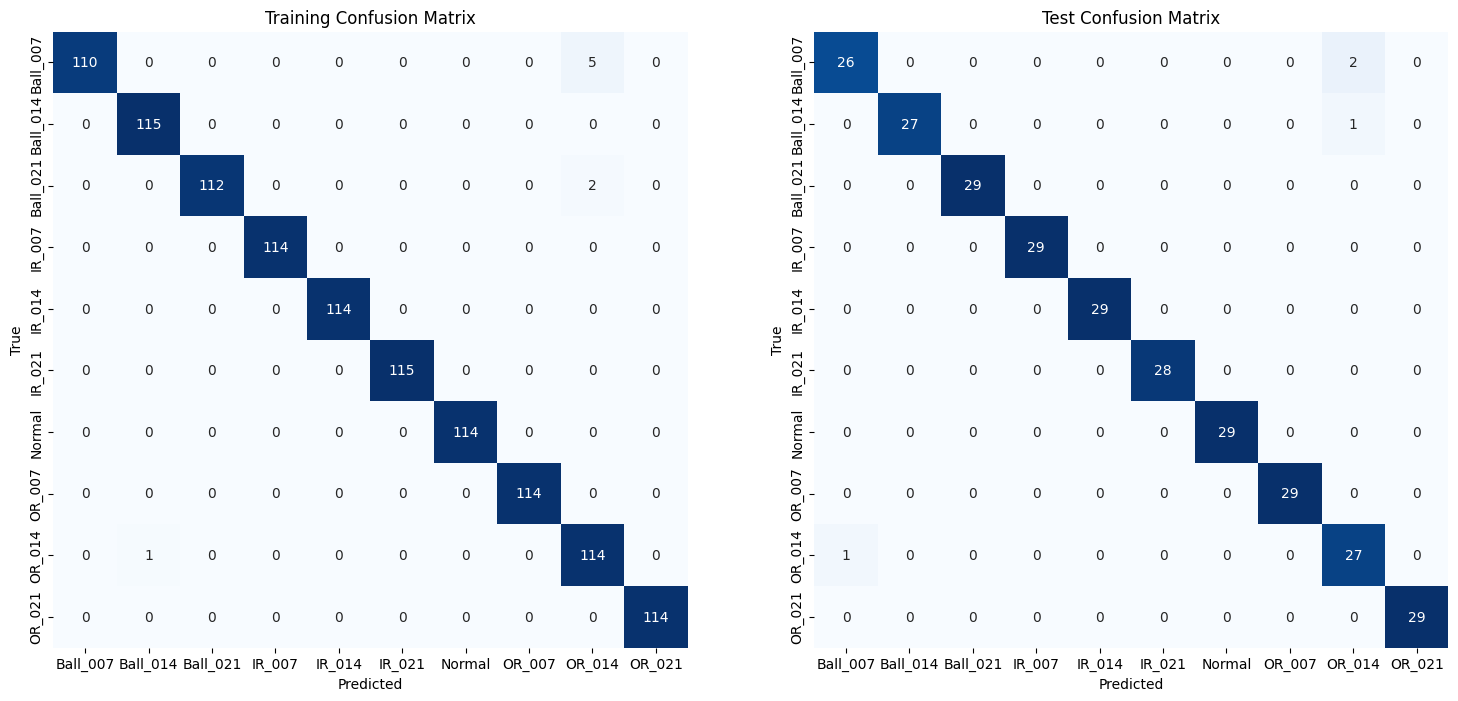

In [30]:
fault_type = _
plt.figure(1,figsize=(18,8))
plt.subplot(121)
sns.heatmap(train_confu_matrix, annot= True,fmt = "d",
xticklabels=fault_type, yticklabels=fault_type, cmap = "Blues", cbar = False)
plt.title('Training Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.subplot(122)
sns.heatmap(test_confu_matrix, annot = True,
xticklabels=fault_type, yticklabels=fault_type, cmap = "Blues", cbar = False)
plt.title('Test Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [31]:
# 使用最佳模型來預測測試集
y_pred = tuned_svm_clf.best_estimator_.predict(test_data_scaled)
# 計算準確率
test_accuracy = accuracy_score(test_data['fault'], y_pred)
print("Test Accuracy:", test_accuracy)

Test Accuracy: 0.986013986013986


## 48k_DE_load1_segment16384_overlap5

In [32]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# 設定隨機種子
SEED = 42
np.random.seed(SEED)
df = pd.read_pickle("datas/48k_DE_load1_segment16384_overlap5_TDFeature.pkl")
df
train_data, test_data = train_test_split(df, test_size = int(len(df) * 0.2), stratify = df['fault'],
                                         random_state = SEED)
test_data['fault'].value_counts()
train_data.shape, test_data.shape
scaler = StandardScaler()
train_data_scaled = scaler.fit_transform(train_data.iloc[:,:-1])
# test_data_scaled = (test_data.iloc[:,:-1].values - scaler.mean_)/np.sqrt(scaler.var_)
test_data_scaled = scaler.transform(test_data.iloc[:,:-1])
parameters = {"C":[1, 10, 50, 100, 300, 500],
             'gamma':[0.01, 0.05, 0.1, 0.5, 1, 5],
             'kernel':["rbf"]}
tuned_svm_clf = GridSearchCV(SVC(),parameters,n_jobs = -1, cv= 10)
tuned_svm_clf.fit(train_data_scaled, train_data['fault'])

GridSearchCV(cv=10, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [1, 10, 50, 100, 300, 500],
                         'gamma': [0.01, 0.05, 0.1, 0.5, 1, 5],
                         'kernel': ['rbf']})

In [33]:
tuned_svm_clf.best_score_

0.9932323232323231

In [34]:
tuned_svm_clf.best_params_

{'C': 50, 'gamma': 0.1, 'kernel': 'rbf'}

Now we will used the best model to find test accuracy.

In [35]:
best_clf = tuned_svm_clf.best_estimator_
best_clf

SVC(C=50, gamma=0.1)

In [36]:
train_predictions = best_clf.predict(train_data_scaled)
test_predictions = best_clf.predict(test_data_scaled)
train_confu_matrix = confusion_matrix(train_data['fault'], train_predictions)
test_confu_matrix = confusion_matrix(test_data['fault'], test_predictions)
_ = list(test_data['fault'].unique())
_.sort()
_

['Ball_007',
 'Ball_014',
 'Ball_021',
 'IR_007',
 'IR_014',
 'IR_021',
 'Normal',
 'OR_007',
 'OR_014',
 'OR_021']

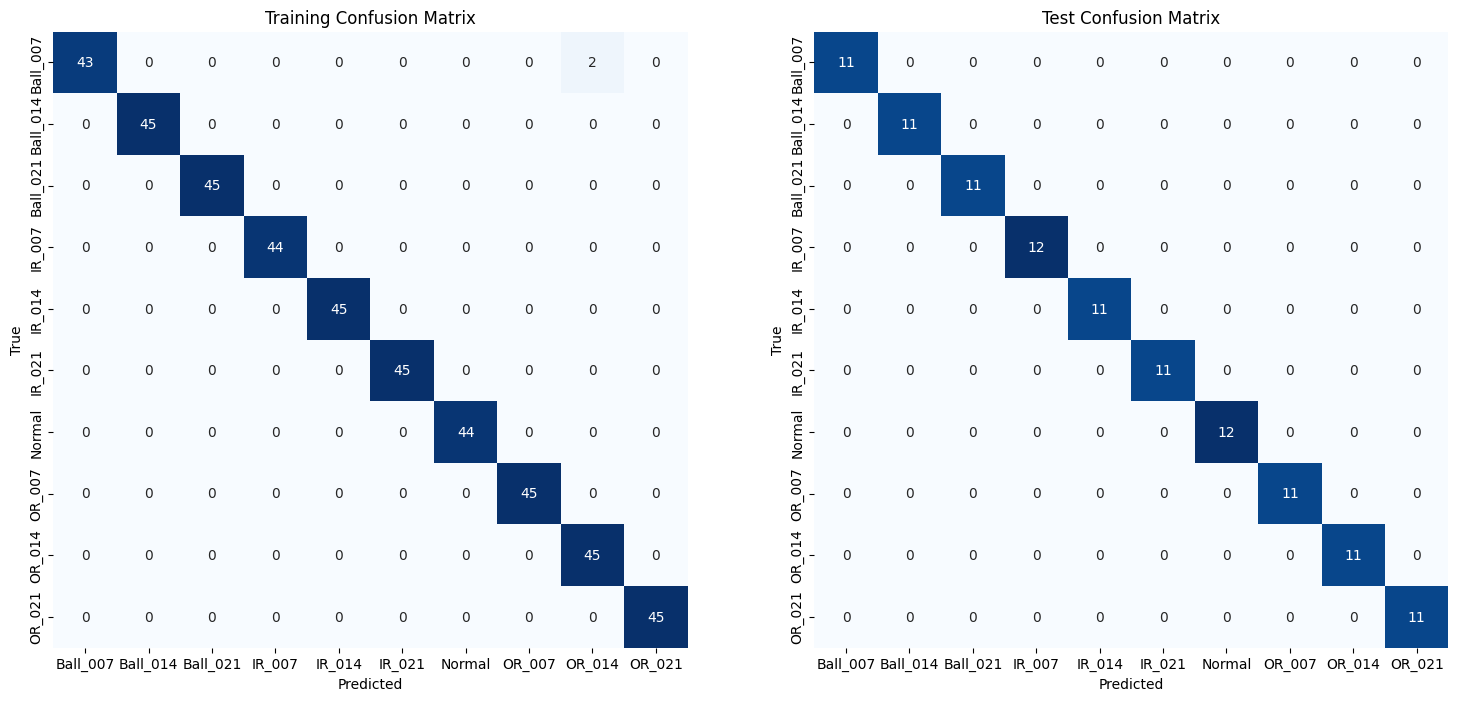

In [37]:
fault_type = _
plt.figure(1,figsize=(18,8))
plt.subplot(121)
sns.heatmap(train_confu_matrix, annot= True,fmt = "d",
xticklabels=fault_type, yticklabels=fault_type, cmap = "Blues", cbar = False)
plt.title('Training Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.subplot(122)
sns.heatmap(test_confu_matrix, annot = True,
xticklabels=fault_type, yticklabels=fault_type, cmap = "Blues", cbar = False)
plt.title('Test Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [38]:
# 使用最佳模型來預測測試集
y_pred = tuned_svm_clf.best_estimator_.predict(test_data_scaled)
# 計算準確率
test_accuracy = accuracy_score(test_data['fault'], y_pred)
print("Test Accuracy:", test_accuracy)

Test Accuracy: 1.0
